In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tva.situation import Situation
import copy

In [2]:
def run_voting_schemes(situation, strategy_name):
    """
    For a given situation and strategy label, run the voting schemes and print:
      1. Non-strategic voting outcome (O)
      2. For each voter i, his/her happiness level (H_i)
      3. Overall voter happiness (H)
      4. For each voter i, the set S_i of strategic voting options
         (each option printed as a tuple: (tilde_v_ij, tilde_O, tilde_H_i, H_i, tilde_H, H))
      5. Overall risk of strategic voting.
    """
    print("======== {} Strategy Results ========".format(strategy_name))
    schemes = situation.schemes
    strategies = situation.strategies

    # Helper to print a scheme's results.
    def print_scheme_output(scheme_name, winner, happiness, overall_happiness):
        print("\n--- {} Voting ---".format(scheme_name))
        print("Non-strategic voting outcome (O):", winner)
        print("For each voter i, happiness level (H_i):", happiness)
        print("Overall voter happiness (H):", overall_happiness)

    # Plurality Voting:
    winner_plurality = schemes.plurality_voting()
    happiness_plurality = schemes.plurality_happiness(winner_plurality)
    overall_happiness_plurality = schemes.overall_happiness(happiness_plurality)
    print_scheme_output("Plurality", winner_plurality, happiness_plurality, overall_happiness_plurality)

    # Anti-Plurality Voting:
    winner_anti_plurality = schemes.anti_plurality_voting()
    happiness_anti_plurality = schemes.anti_plurality_happiness(winner_anti_plurality)
    overall_happiness_anti_plurality = schemes.overall_happiness(happiness_anti_plurality)
    print_scheme_output("Anti-Plurality", winner_anti_plurality, happiness_anti_plurality,
                        overall_happiness_anti_plurality)

    # Voting-for-Two Voting:
    winner_voting_for_two = schemes.voting_for_two()
    happiness_voting_for_two = schemes.voting_for_two_happiness(winner_voting_for_two)
    overall_happiness_voting_for_two = schemes.overall_happiness(happiness_voting_for_two)
    print_scheme_output("Voting-for-Two", winner_voting_for_two, happiness_voting_for_two,
                        overall_happiness_voting_for_two)

    # Borda Voting:
    winner_borda = schemes.borda_voting()
    happiness_borda = schemes.borda_happiness(winner_borda)
    overall_happiness_borda = schemes.overall_happiness(happiness_borda)
    print_scheme_output("Borda", winner_borda, happiness_borda, overall_happiness_borda)

    # Get strategic options dynamically for all schemes.
    strategic_options = strategies.get_strategic_options(schemes)
    print("\n--- Strategic Voting Options (S_i) ---")
    for i, voter_options in enumerate(strategic_options):
        voter_num = i + 1
        print("\nFor voter {}: S_{} = ".format(voter_num, voter_num))
        if voter_options:
            for hsceme, option in voter_options.items():
                print("  Scheme:", scheme)
                print("    s_ij = (")
                print("         tilde_v_ij (modified_preferences):", option["modified_preferences"])
                print("         tilde_O (voting_outcome):", option["voting_outcome"])
                print("         tilde_H_i (modified_voter_happiness):", option["modified_voter_happiness"])
                print("         H_i (original_voter_happiness):", option["original_voter_happiness"])
                print("         tilde_H (modified_overall_happiness):", option["modified_overall_happiness"])
                print("         H (original_overall_happiness):", option["original_overall_happiness"])
                print("    )")
        else:
            print("    S_{} is empty.".format(voter_num))

    num_voters = len(situation.preference_matrix)
    strat_voting_risk = strategies.compute_strategic_risk(strategic_options, num_voters)
    print("\nOverall risk of strategic voting:", strat_voting_risk)

In [7]:
situation.preference_matrix

[['C', 'E', 'D', 'B', 'A'],
 ['D', 'E', 'A', 'B', 'C'],
 ['E', 'C', 'A', 'B', 'D'],
 ['B', 'C', 'A', 'D', 'E'],
 ['D', 'C', 'E', 'B', 'A']]

In [8]:
situation_compromising.preference_matrix

[['E', 'C', 'D', 'B', 'A'],
 ['E', 'D', 'A', 'B', 'C'],
 ['C', 'E', 'A', 'B', 'D'],
 ['C', 'B', 'A', 'D', 'E'],
 ['C', 'D', 'E', 'B', 'A']]

In [5]:
# Create the initial voting situation.
situation = Situation()
print("=== Initial Voting Situation ===")
situation.print_preference_matrix()

# Create deep copies for different strategies.
situation_compromising = copy.deepcopy(situation)
situation_burying = copy.deepcopy(situation)

# Compromising Strategy:
situation_compromising.strategies.compromising()
print("\n=== After Strategic (Compromising) Adjustment ===")
situation_compromising.print_preference_matrix()
# run_voting_schemes(situation_compromising, "Compromising")

# # Burying Strategy:
# situation_burying.strategies.burying()
# print("\n=== After Strategic (Burying) Adjustment ===")
# situation_burying.print_preference_matrix()
# run_voting_schemes(situation_burying, "Burying")


=== Initial Voting Situation ===
Preference matrix:
         V0 V1 V2 V3 V4
Rank 1   C  D  E  B  D
Rank 2   E  E  C  C  C
Rank 3   D  A  A  A  E
Rank 4   B  B  B  D  B
Rank 5   A  C  D  E  A

=== After Strategic (Compromising) Adjustment ===
Preference matrix:
         V0 V1 V2 V3 V4
Rank 1   E  E  C  C  C
Rank 2   C  D  E  B  D
Rank 3   D  A  A  A  E
Rank 4   B  B  B  D  B
Rank 5   A  C  D  E  A


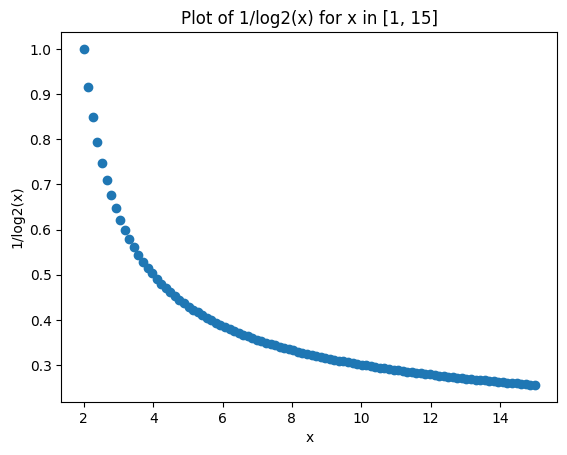

In [6]:
# Plot function 1/log2(x) for x in [1, 15]

x = np.linspace(2, 15, 100)
y = 1/np.log2(x)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('1/log2(x)')
plt.title('Plot of 1/log2(x) for x in [1, 15]')
plt.show()


In [ ]:
1 / log2(r + 1)